In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [44]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
num_classes = 10
input_shape = (28, 28, 1)

In [5]:
print(x_train.max(), x_train.min())

255 0


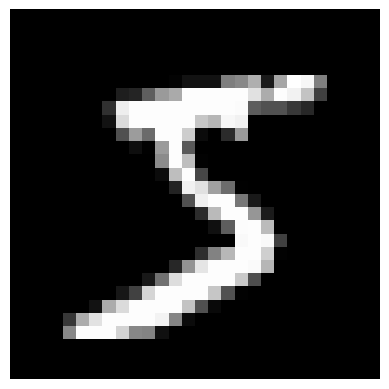

In [6]:
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [6]:
# Scale images to the [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [45]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units = 10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [11]:
batch_size = 128
epochs = 15

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 15s 33ms/step - loss: 0.2547 - accuracy: 0.9236 - val_loss: 0.0756 - val_accuracy: 0.9785
Epoch 2/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0665 - accuracy: 0.9791 - val_loss: 0.0566 - val_accuracy: 0.9832
Epoch 3/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0463 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 14s 33ms/step - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0511 - val_accuracy: 0.9857
Epoch 5/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0435 - val_accuracy: 0.9868
Epoch 6/15
422/422 [==============================] - 14s 33ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0383 - val_accuracy: 0.9910
Epoch 7/15
422/422 [==============================] - 14s 33ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0435 - val_accuracy:

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.038239799439907074
Test accuracy: 0.9908999800682068


In [46]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [47]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

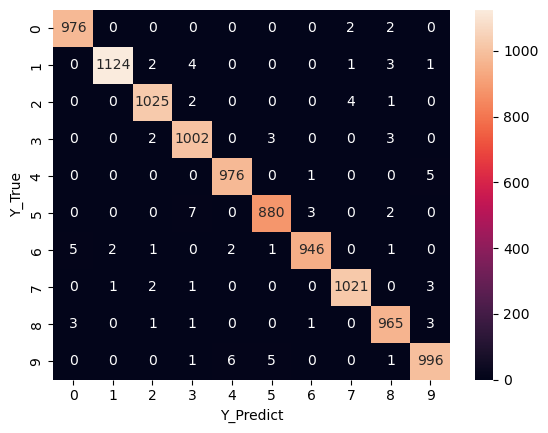

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Y_Predict')
plt.ylabel('Y_True')
plt.show()